<a href="https://colab.research.google.com/github/minofeel/-/blob/main/tiny_gp_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tiny genetic programming plus, by © moshe sipper, www.moshesipper.com
# graphic output, dynamic progress display, bloat-control option
# need to install https://pypi.org/project/graphviz/

from random import random, randint, seed
from statistics import mean
from copy import deepcopy
import matplotlib.pyplot as plt
from IPython.display import Image, display
from graphviz import Digraph, Source

POP_SIZE        = 60    # population size
MIN_DEPTH       = 2     # minimal initial random tree depth
MAX_DEPTH       = 5     # maximal initial random tree depth
GENERATIONS     = 250   # maximal number of generations to run evolution
TOURNAMENT_SIZE = 5     # size of tournament for tournament selection
XO_RATE         = 0.8   # crossover rate
PROB_MUTATION   = 0.2   # per-node mutation probability
BLOAT_CONTROL   = False # True adds bloat control to fitness function

def add(x, y): return x + y
def sub(x, y): return x - y
def mul(x, y): return x * y
FUNCTIONS = [add, sub, mul]
TERMINALS = ['x', -2, -1, 0, 1, 2]

def target_func(x): # evolution's target
    return x*x*x*x + x*x*x + x*x + x + 1

def generate_dataset(): # generate 101 data points from target_func
    dataset = []
    for x in range(-100,101,2):
        x /= 100
        dataset.append([x, target_func(x)])
    return dataset


In [5]:
class GPTree:
    def __init__(self, data = None, left = None, right = None):
        self.data  = data
        self.left  = left
        self.right = right

    def node_label(self): # return string label
        if (self.data in FUNCTIONS):
            return self.data.__name__
        else:
            return str(self.data)

    def draw(self, dot, count): # dot & count are lists in order to pass "by reference"
        node_name = str(count[0])
        dot[0].node(node_name, self.node_label())
        if self.left:
            count[0] += 1
            dot[0].edge(node_name, str(count[0]))
            self.left.draw(dot, count)
        if self.right:
            count[0] += 1
            dot[0].edge(node_name, str(count[0]))
            self.right.draw(dot, count)

    def draw_tree(self, fname, footer):
      dot = [Digraph()]
      dot[0].attr(kw='graph', label=footer)
      count = [0]
      self.draw(dot, count)
      dot[0].render(filename=fname, format="png")  # 수정된 부분
      display(Image(filename=fname + ".png"))      # 이미지 파일 경로 수정

    def compute_tree(self, x):
        if (self.data in FUNCTIONS):
            return self.data(self.left.compute_tree(x), self.right.compute_tree(x))
        elif self.data == 'x': return x
        else: return self.data

    def random_tree(self, grow, max_depth, depth = 0): # create random tree using either grow or full method
        if depth < MIN_DEPTH or (depth < max_depth and not grow):
            self.data = FUNCTIONS[randint(0, len(FUNCTIONS)-1)]
        elif depth >= max_depth:
            self.data = TERMINALS[randint(0, len(TERMINALS)-1)]
        else: # intermediate depth, grow
            if random () > 0.5:
                self.data = TERMINALS[randint(0, len(TERMINALS)-1)]
            else:
                self.data = FUNCTIONS[randint(0, len(FUNCTIONS)-1)]
        if self.data in FUNCTIONS:
            self.left = GPTree()
            self.left.random_tree(grow, max_depth, depth = depth + 1)
            self.right = GPTree()
            self.right.random_tree(grow, max_depth, depth = depth + 1)

    def mutation(self):
        if random() < PROB_MUTATION: # mutate at this node
            self.random_tree(grow = True, max_depth = 2)
        elif self.left: self.left.mutation()
        elif self.right: self.right.mutation()

#    def depth(self):
#        if self.data in TERMINALS: return 0
#        l = self.left.depth()  if self.left  else 0
#        r = self.right.depth() if self.right else 0
#        return 1 + max(l, r)

    def size(self): # tree size in nodes
        if self.data in TERMINALS: return 1
        l = self.left.size()  if self.left  else 0
        r = self.right.size() if self.right else 0
        return 1 + l + r

    def build_subtree(self): # count is list in order to pass "by reference"
        t = GPTree()
        t.data = self.data
        if self.left:  t.left  = self.left.build_subtree()
        if self.right: t.right = self.right.build_subtree()
        return t

    def scan_tree(self, count, second): # note: count is list, so it's passed "by reference"
        count[0] -= 1
        if count[0] <= 1:
            if not second: # return subtree rooted here
                return self.build_subtree()
            else: # glue subtree here
                self.data  = second.data
                self.left  = second.left
                self.right = second.right
        else:
            ret = None
            if self.left  and count[0] > 1: ret = self.left.scan_tree(count, second)
            if self.right and count[0] > 1: ret = self.right.scan_tree(count, second)
            return ret

    def crossover(self, other): # xo 2 trees at random nodes
        if random() < XO_RATE:
            second = other.scan_tree([randint(1, other.size())], None) # 2nd random subtree
            self.scan_tree([randint(1, self.size())], second) # 2nd subtree "glued" inside 1st tree
# end class GPTree

________________________


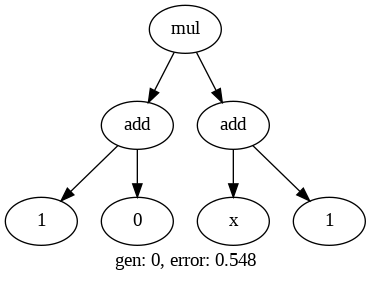

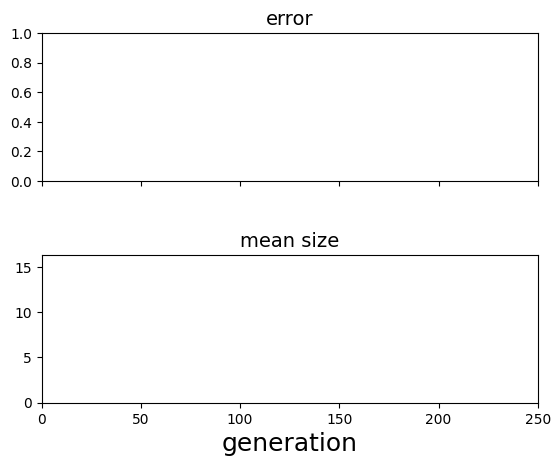

Generation 0, Min Error: 0.5480528, Mean Size: 16.333333333333332


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 1, Min Error: 0.5480528, Mean Size: 15


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 2, Min Error: 0.5480528, Mean Size: 11.533333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 3, Min Error: 0.5480528, Mean Size: 10.433333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 4, Min Error: 0.5480528, Mean Size: 12.133333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 5, Min Error: 0.5480528, Mean Size: 11.4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 6, Min Error: 0.5480528, Mean Size: 10.9


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 7, Min Error: 0.5480528, Mean Size: 7.666666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 8, Min Error: 0.5480528, Mean Size: 6.2


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 9, Min Error: 0.5480528, Mean Size: 5.666666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 10, Min Error: 0.5480528, Mean Size: 5.4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 11, Min Error: 0.5480528, Mean Size: 4.866666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 12, Min Error: 0.5480528, Mean Size: 5.3


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 13, Min Error: 0.5480528, Mean Size: 6.066666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 14, Min Error: 0.5480528, Mean Size: 5.133333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 15, Min Error: 0.5480528, Mean Size: 4.933333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 16, Min Error: 0.5480528, Mean Size: 4.8


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 17, Min Error: 0.5480528, Mean Size: 6.1


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 18, Min Error: 0.5480528, Mean Size: 5.466666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 19, Min Error: 0.5480528, Mean Size: 5.333333333333333


<Figure size 640x480 with 0 Axes>

________________________


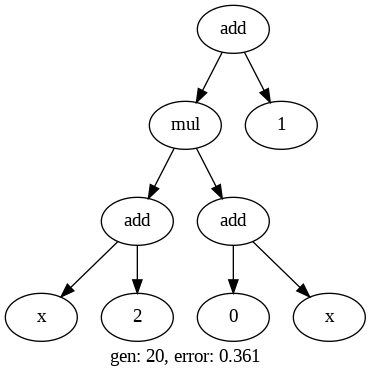

<Figure size 640x480 with 0 Axes>

Generation 20, Min Error: 0.36121492277227724, Mean Size: 5.466666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 21, Min Error: 0.36121492277227724, Mean Size: 5.8


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 22, Min Error: 0.5480528, Mean Size: 5.933333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 23, Min Error: 0.5480528, Mean Size: 5.2


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 24, Min Error: 0.5480528, Mean Size: 5.1


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 25, Min Error: 0.5480528, Mean Size: 5.9


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 26, Min Error: 0.5480528, Mean Size: 5.6


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 27, Min Error: 0.5480528, Mean Size: 5.333333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 28, Min Error: 0.5480528, Mean Size: 4.4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 29, Min Error: 0.5480528, Mean Size: 5.233333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 30, Min Error: 0.5480528, Mean Size: 5.033333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 31, Min Error: 0.5480528, Mean Size: 4.9


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 32, Min Error: 0.5480528, Mean Size: 4.733333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 33, Min Error: 0.5480528, Mean Size: 5.233333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 34, Min Error: 0.5480528, Mean Size: 5.233333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 35, Min Error: 0.5480528, Mean Size: 5.066666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 36, Min Error: 0.5480528, Mean Size: 4.1


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 37, Min Error: 0.5480528, Mean Size: 5.466666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 38, Min Error: 0.5480528, Mean Size: 5.5


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 39, Min Error: 0.5480528, Mean Size: 4.6


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 40, Min Error: 0.5480528, Mean Size: 4.866666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 41, Min Error: 0.5480528, Mean Size: 4.933333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 42, Min Error: 0.5480528, Mean Size: 4.366666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 43, Min Error: 0.5480528, Mean Size: 5.366666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 44, Min Error: 0.5480528, Mean Size: 5.366666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 45, Min Error: 0.5480528, Mean Size: 5.366666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 46, Min Error: 0.5480528, Mean Size: 4.766666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 47, Min Error: 0.5480528, Mean Size: 5.4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 48, Min Error: 0.36121492277227724, Mean Size: 5.733333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 49, Min Error: 0.36121492277227724, Mean Size: 5.8


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 50, Min Error: 0.36121492277227724, Mean Size: 6.166666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 51, Min Error: 0.36121492277227724, Mean Size: 6.466666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 52, Min Error: 0.36121492277227724, Mean Size: 8.766666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 53, Min Error: 0.36121492277227724, Mean Size: 8


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 54, Min Error: 0.36121492277227724, Mean Size: 8.333333333333334


<Figure size 640x480 with 0 Axes>

________________________


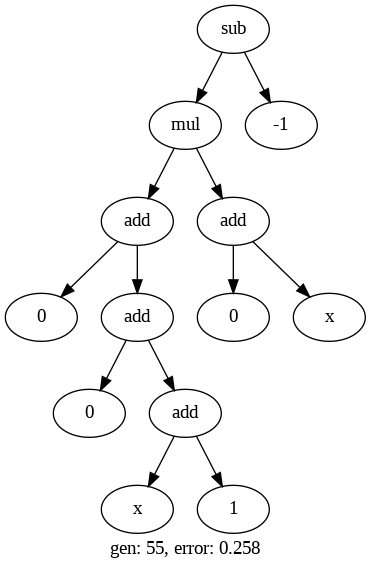

<Figure size 640x480 with 0 Axes>

Generation 55, Min Error: 0.2575247524752475, Mean Size: 7.833333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 56, Min Error: 0.2575247524752475, Mean Size: 7.366666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 57, Min Error: 0.36121492277227724, Mean Size: 6.9


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 58, Min Error: 0.36121492277227724, Mean Size: 7.666666666666667


<Figure size 640x480 with 0 Axes>

________________________


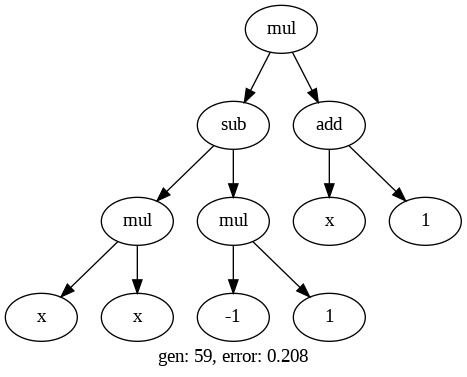

<Figure size 640x480 with 0 Axes>

Generation 59, Min Error: 0.20805279999999995, Mean Size: 9.166666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 60, Min Error: 0.20805279999999995, Mean Size: 7.833333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 61, Min Error: 0.36121492277227724, Mean Size: 9.233333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 62, Min Error: 0.36121492277227724, Mean Size: 8.866666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 63, Min Error: 0.2575247524752475, Mean Size: 11.733333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 64, Min Error: 0.2575247524752475, Mean Size: 9.2


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 65, Min Error: 0.2575247524752475, Mean Size: 9.966666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 66, Min Error: 0.2575247524752475, Mean Size: 8.266666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 67, Min Error: 0.2575247524752475, Mean Size: 8.1


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 68, Min Error: 0.2575247524752475, Mean Size: 9.033333333333333


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 69, Min Error: 0.2575247524752475, Mean Size: 9.366666666666667


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 70, Min Error: 0.2575247524752475, Mean Size: 10.933333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 71, Min Error: 0.2575247524752475, Mean Size: 11.1


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 72, Min Error: 0.2575247524752475, Mean Size: 12.466666666666667


<Figure size 640x480 with 0 Axes>

________________________


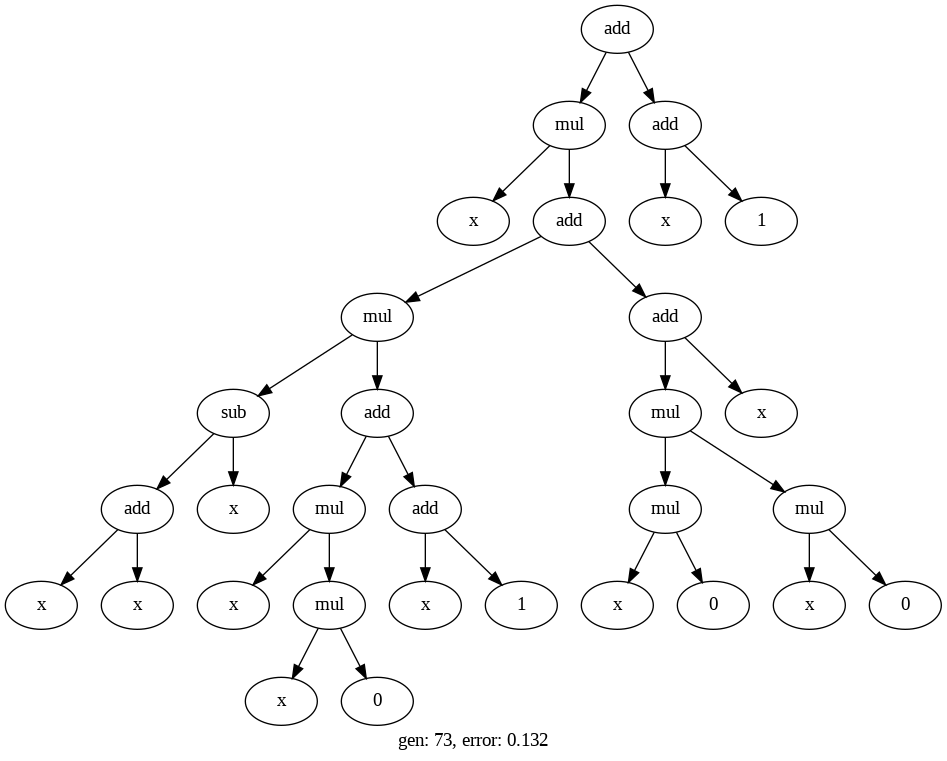

<Figure size 640x480 with 0 Axes>

Generation 73, Min Error: 0.13194720000000001, Mean Size: 15.8


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 74, Min Error: 0.13194720000000001, Mean Size: 19.266666666666666


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 75, Min Error: 0.13194720000000001, Mean Size: 22.733333333333334


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 76, Min Error: 0.13194720000000001, Mean Size: 22.166666666666668


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 77, Min Error: 0.13194720000000001, Mean Size: 23.966666666666665


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Generation 78, Min Error: 0.13194720000000001, Mean Size: 24.4


<Figure size 640x480 with 0 Axes>

________________________


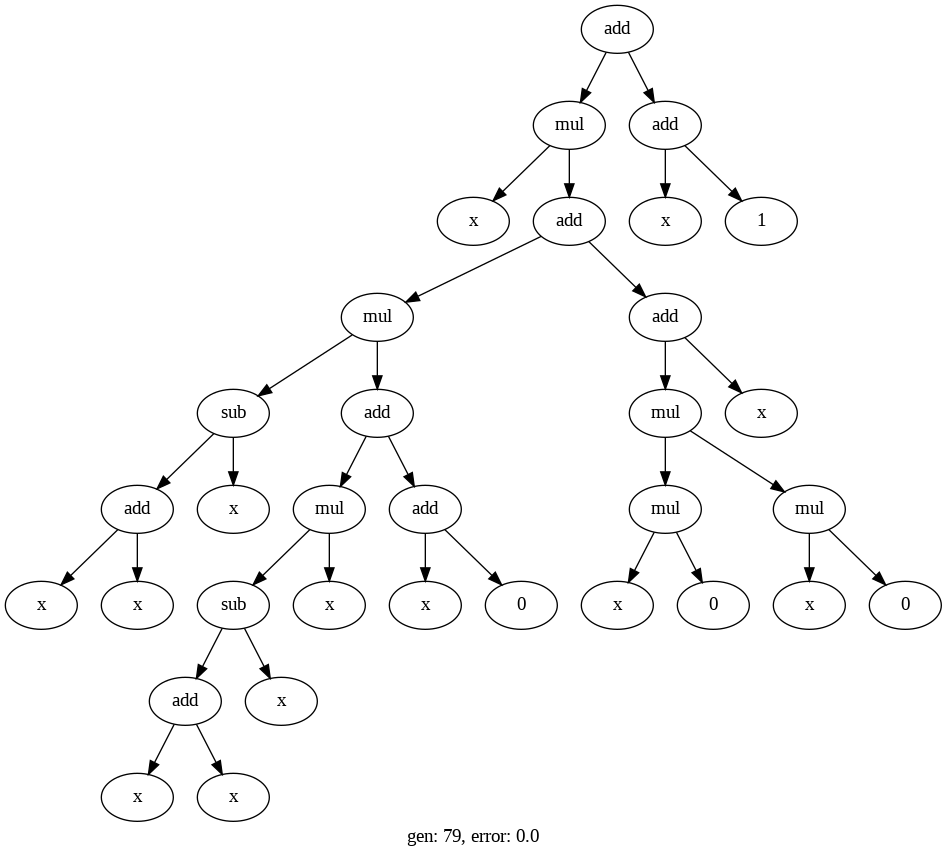

<Figure size 640x480 with 0 Axes>

_________________________________________________
END OF RUN (bloat control was OFF)


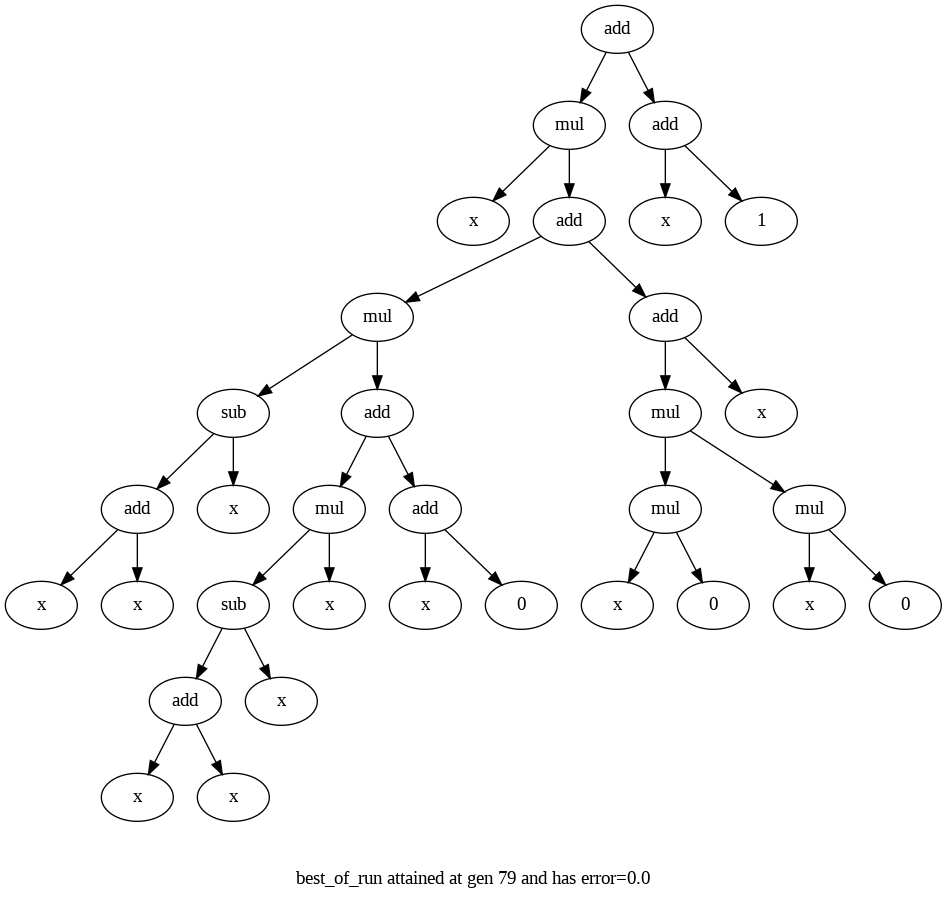

In [7]:
def init_population(): # ramped half-and-half
    pop = []
    for md in range(3, MAX_DEPTH + 1):
        for i in range(int(POP_SIZE/6)):
            t = GPTree()
            t.random_tree(grow = True, max_depth = md) # grow
            pop.append(t)
        for i in range(int(POP_SIZE/6)):
            t = GPTree()
            t.random_tree(grow = False, max_depth = md) # full
            pop.append(t)
    return pop

def error(individual, dataset):
    return mean([abs(individual.compute_tree(ds[0]) - ds[1]) for ds in dataset])

def fitness(individual, dataset):
    if BLOAT_CONTROL:
        return 1 / (1 + error(individual, dataset) + 0.01*individual.size())
    else:
        return 1 / (1 + error(individual, dataset))

def selection(population, fitnesses): # select one individual using tournament selection
    tournament = [randint(0, len(population)-1) for i in range(TOURNAMENT_SIZE)] # select tournament contenders
    tournament_fitnesses = [fitnesses[tournament[i]] for i in range(TOURNAMENT_SIZE)]
    return deepcopy(population[tournament[tournament_fitnesses.index(max(tournament_fitnesses))]])

def prepare_plots():
    fig, axarr = plt.subplots(2, sharex=True)
    # fig.canvas.set_window_title('EVOLUTIONARY PROGRESS')  # 제거
    fig.subplots_adjust(hspace = 0.5)
    axarr[0].set_title('error', fontsize=14)
    axarr[1].set_title('mean size', fontsize=14)
    plt.xlabel('generation', fontsize=18)
    plt.ion()  # interactive mode for plot
    axarr[0].set_xlim(0, GENERATIONS)
    axarr[0].set_ylim(0, 1)  # fitness range
    xdata = []
    ydata = [[], []]
    line = [None, None]
    line[0], = axarr[0].plot(xdata, ydata[0], 'b-')  # 'b-' = blue line
    line[1], = axarr[1].plot(xdata, ydata[1], 'r-')  # 'r-' = red line
    return axarr, line, xdata, ydata

def plot(axarr, line, xdata, ydata, gen, pop, errors, max_mean_size):
    xdata.append(gen)
    ydata[0].append(min(errors))
    line[0].set_xdata(xdata)
    line[0].set_ydata(ydata[0])

    sizes = [ind.size() for ind in pop]
    if mean(sizes) > max_mean_size[0]:
        max_mean_size[0] = mean(sizes)
        axarr[1].set_ylim(0, max_mean_size[0])

    ydata[1].append(mean(sizes))
    line[1].set_xdata(xdata)
    line[1].set_ydata(ydata[1])

    plt.draw()
    plt.pause(0.01)

def main():
    # init stuff
    seed() # init internal state of random number generator
    dataset = generate_dataset()
    population= init_population()
    best_of_run = None
    best_of_run_error = 1e20
    best_of_run_gen = 0
    fitnesses = [fitness(ind, dataset) for ind in population]
    max_mean_size = [0] # track maximal mean size for plotting
    axarr, line, xdata, ydata = prepare_plots()

    # go evolution!
    for gen in range(GENERATIONS):
        nextgen_population=[]
        for i in range(POP_SIZE):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            parent1.crossover(parent2)
            parent1.mutation()
            nextgen_population.append(parent1)
        population=nextgen_population
        fitnesses = [fitness(ind, dataset) for ind in population]
        errors = [error(ind, dataset) for ind in population]
        if min(errors) < best_of_run_error:
            best_of_run_error = min(errors)
            best_of_run_gen = gen
            best_of_run = deepcopy(population[errors.index(min(errors))])
            print("________________________")
            best_of_run.draw_tree("best_of_run",\
                                  "gen: " + str(gen) + ", error: " + str(round(best_of_run_error,3)))
        plot(axarr, line, xdata, ydata, gen, population, errors, max_mean_size)
        if best_of_run_error <= 1e-5: break
        sizes = [ind.size() for ind in population]  # 트리 크기
        # 디버깅 코드 추가
        print(f"Generation {gen}, Min Error: {min(errors)}, Mean Size: {mean(sizes)}")

        if min(errors) < best_of_run_error:
          best_of_run_error = min(errors)
          best_of_run_gen = gen
          best_of_run = deepcopy(population[errors.index(min(errors))])
          print("________________________")
          best_of_run.draw_tree("best_of_run", "gen: " + str(gen) + ", error: " + str(round(best_of_run_error, 3)))

        plot(axarr, line, xdata, ydata, gen, population, errors, max_mean_size)

        # 조기 종료 조건 디버깅 코드 추가
        if best_of_run_error <= 1e-5:
          print(f"Early stop at generation {gen} with best error {best_of_run_error}")
          break

    endrun = "_________________________________________________\nEND OF RUN (bloat control was "
    endrun += "ON)" if BLOAT_CONTROL else "OFF)"
    print(endrun)
    s = "\n\nbest_of_run attained at gen " + str(best_of_run_gen) + " and has error=" + str(round(best_of_run_error,3))
    best_of_run.draw_tree("best_of_run",s)

if __name__== "__main__":
  main()